In [34]:
%reset -f 

In [35]:
# Random Forest Regressor Class

In [36]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image, display
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
# Definition of Random Forest Regression Class with functions

class randomforestreg:
    
    # Dunder method init
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test
    
    # Dunder method del
    def __del__(self):
        print("The Scikit Learn Random Forest Regressor has been deleted")
        
    # Initialize and Train Regression Model
    def buildregmodel(self,x_train, y_train, no_of_estimators, measurement_criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf):
        self.x_train = x_train
        self.y_train = y_train
        self.no_of_estimators = no_of_estimators
        self.measurement_criterion = measurement_criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.min_weight_fraction_leaf = min_weight_fraction_leaf
        
        regmodel = RandomForestRegressor(n_estimators=no_of_estimators, criterion = measurement_criterion, max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf, min_weight_fraction_leaf = min_weight_fraction_leaf)      
        regmodel.fit(x_train,y_train)
        
        return regmodel
    
    # Evaluate and test the model of the Scikit Learn Random Forest Regressor
    def testregmodel(self, x_test, y_test, regmodel):
        self.x_test = x_test
        self.y_test = y_test
        self.regmodel = regmodel
     
        score=regmodel.score(x_test,y_test)
        return score
    
    # Plot the tree graph(s)  
    def get_tree_graph(self, regmodel, x):
        self.x=x
        self.regmodel=regmodel
        feature_list = list(x.columns)
        tree_counter = 0
        for tree_in_forest in regmodel.estimators_:
            file_name1 = 'tree_' + str(tree_counter) + '.dot'
            file_name2 = 'tree_' + str(tree_counter) + '.png'
            tree = regmodel.estimators_[tree_counter]
            export_graphviz(tree, out_file = file_name1, feature_names = feature_list, rounded = True, precision = 1)
            (graph, ) = pydot.graph_from_dot_file(file_name1)
            graph.write_png(file_name2)
            plt = Image(file_name2)
            display(plt)
            tree_counter += 1
            
    def get_importances_graph(self,regmodel,x):
        self.x=x
        self.regmodel=regmodel
        # Set the style
        plt.style.use('fivethirtyeight')
        # list of x locations for plotting
        importances = list(regmodel.feature_importances_)
        x_values = list(range(len(importances)))
        # Make a bar chart
        plt.bar(x_values, importances, orientation = 'vertical')
        # Tick labels for x axis
        feature_list = list(x.columns)
        plt.xticks(x_values, feature_list, rotation='vertical')
        # Axis labels and title
        plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
    
    
    # Predict new results
    def predictregmodel(self,regmodel,x_predict):
        self.regmodel = regmodel
        self.x_predict = x_predict
        
        y_predict=regmodel.predict(x_predict)
        return y_predict
    


In [38]:
# Read Data Set and Split into X_Train, Y_Train, X_Test and Y_Test

# Read Data Set
df=pd.read_excel('Real estate valuation data set.xlsx')

# Define X and Y Data
x=df.drop(columns=['Y house price of unit area', 'No']) # inputs
y=df['Y house price of unit area']                # outputs

# Splitting the data (20% recommended)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [39]:
# Define Settings for Regressor

#Criteria for the Random Forest Regressor Model:
no_of_estimators = 3 # integer value: number of trees in the forest
measurement_criterion = 'mse' #also possible: mse, mae
max_depth = 10 # integer value: maximum depth of the tree
min_samples_split = 3 # integer value >=2: the min number of samples required to split an internal node
min_samples_leaf = 3 # integer value >=1: The minimum number of samples required to be at a leaf node
min_weight_fraction_leaf = 0.007 # float value between 0 and 0.5 The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.

In [40]:
# Initialize the Regression Model

regressionmodel = randomforestreg(x_train, x_test, y_train, y_test) # creation of the object
regmodel = regressionmodel.buildregmodel(x_train, y_train, no_of_estimators, measurement_criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf) # creation of the model

In [41]:
# Get Model Quality Information

quality = regressionmodel.testregmodel(x_test, y_test, regmodel) # measure of the quality 
print(measurement_criterion + "=" + str(quality))

mse=0.6252674341340368


The Scikit Learn Random Forest Regressor has been deleted


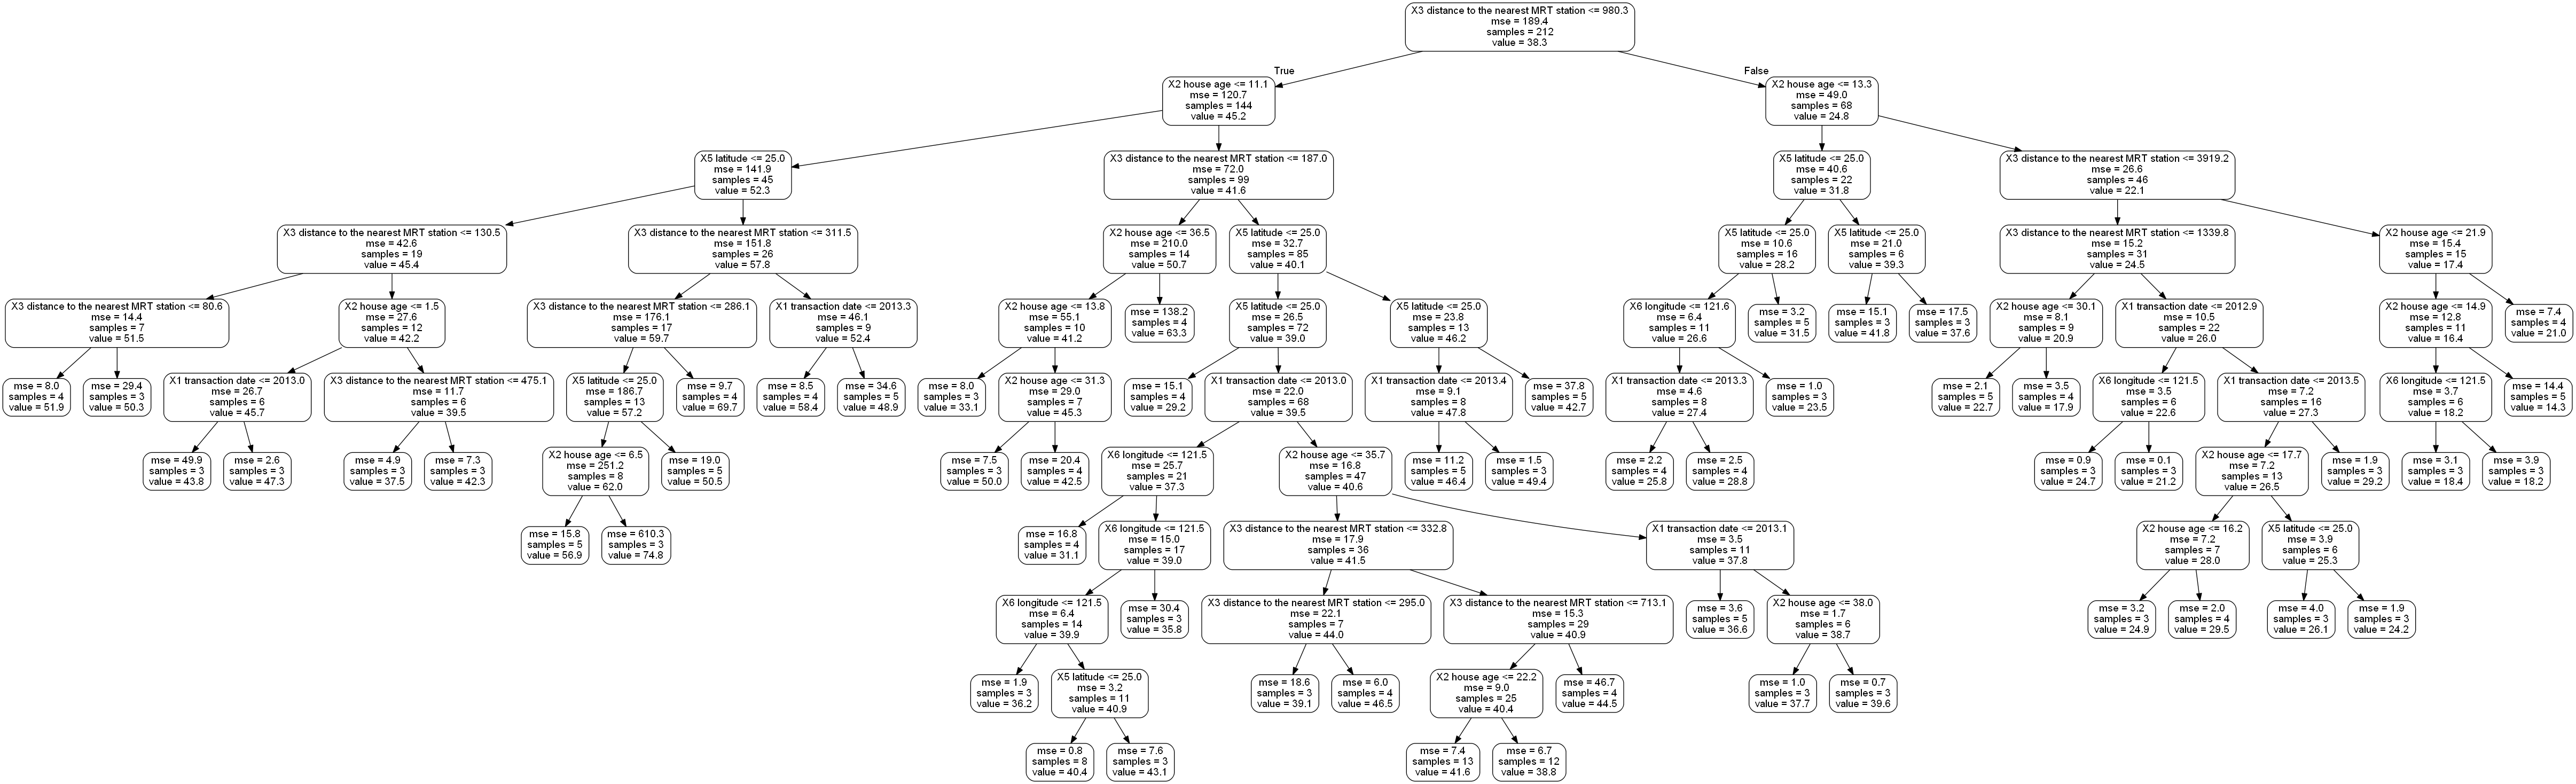

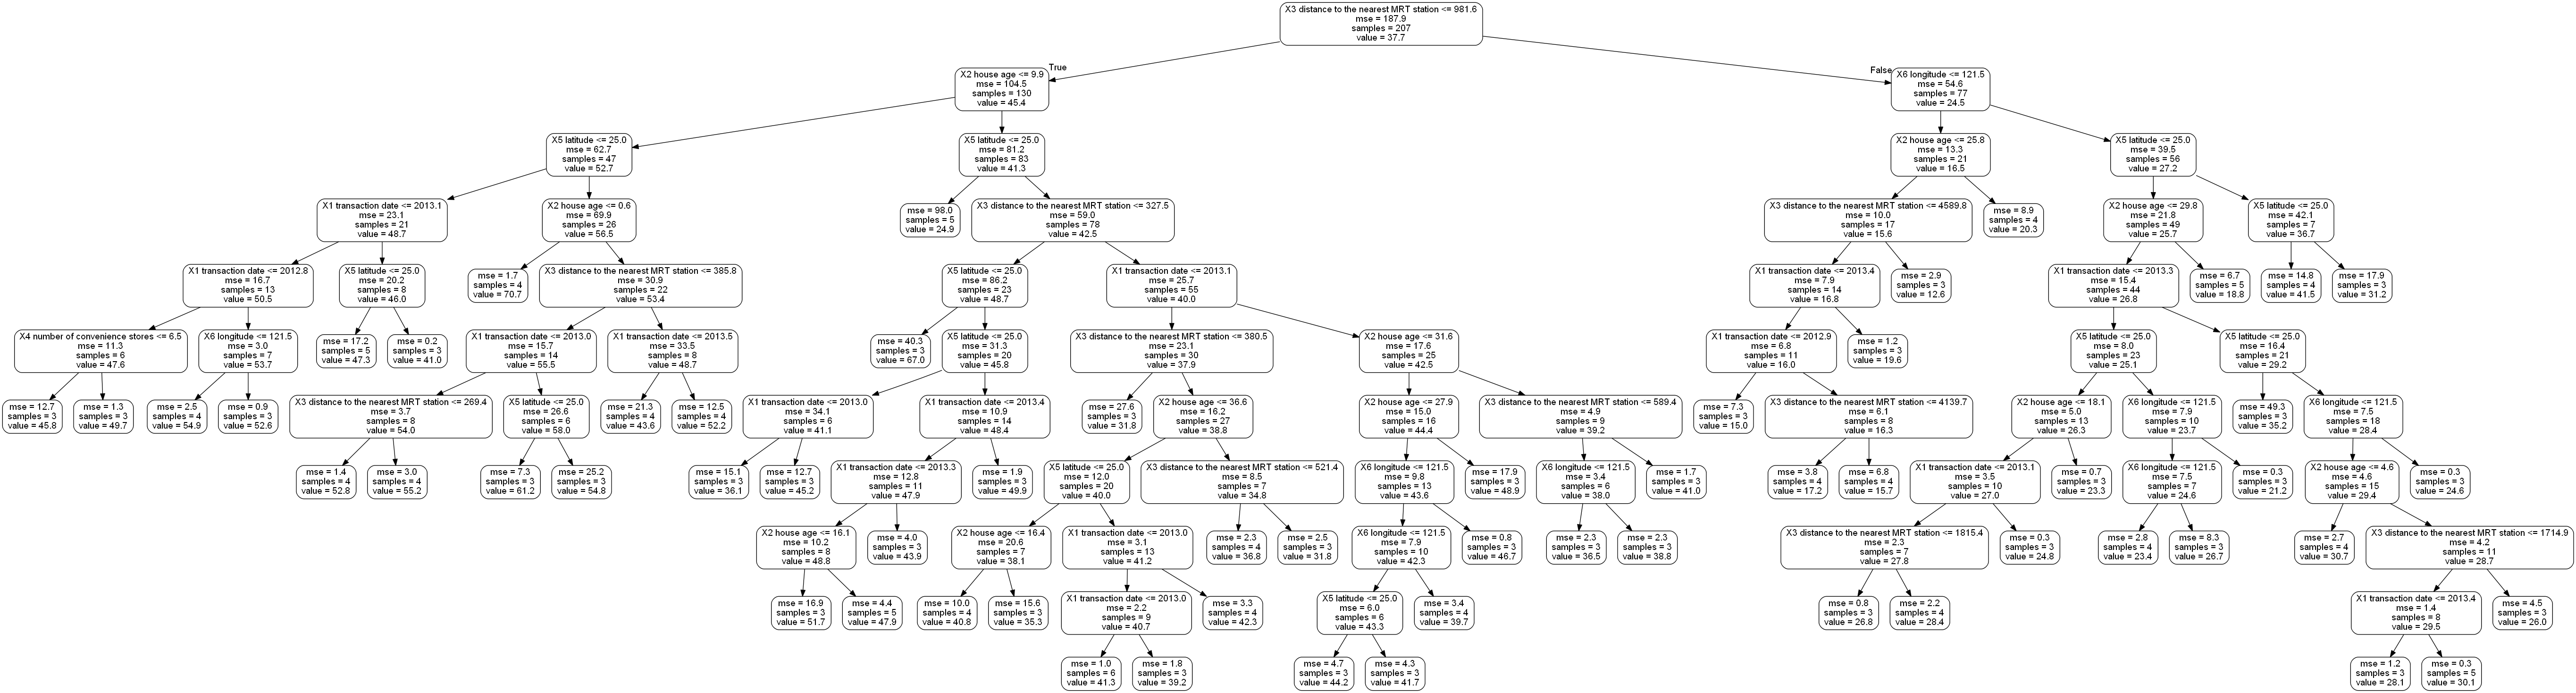

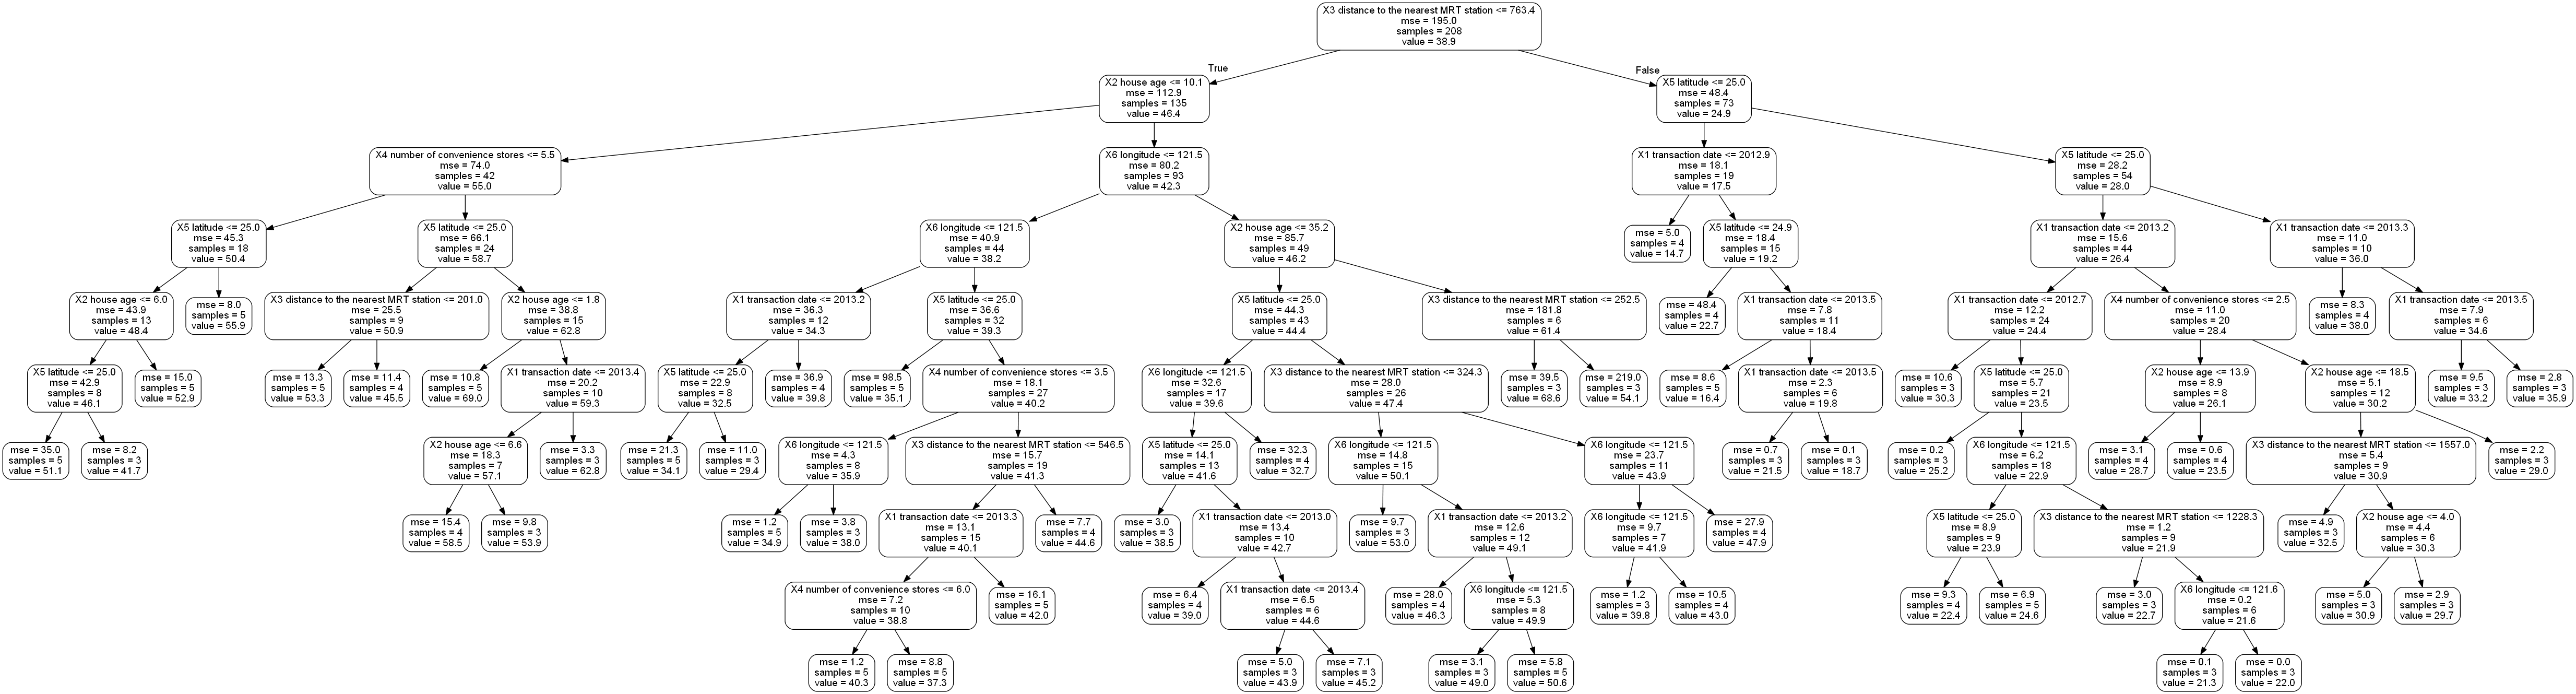

In [42]:
# Plotting the Model

regressionmodel.get_tree_graph(regmodel,x)

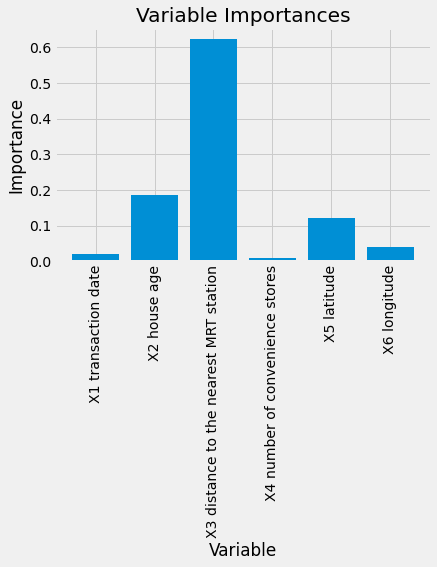

In [43]:
# Plotting Variable Importances

#regressionmodel.get_importances_graph(regmodel,x)
regressionmodel.get_importances_graph(x)

In [44]:
# Predict Values
x_predict = [[2017, 25, 60, 20, 20, 100]]
predicted_Y = regressionmodel.predictregmodel(regmodel, x_predict)
print(predicted_Y)

[38.24444444]


In [45]:
# Get Forest Parameters
parameters = regmodel.get_params()
print(parameters)

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.007, 'n_estimators': 3, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
